## Load libraries

In [1]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
import numpy as np

# Libraries to visualize data
import seaborn as sns
import matplotlib.cm as cm
from cluster_visualization_helper import (
    compute_cluster_visualization,
    visualize_cluster)  # user-defined functions

## Configurate and declare global variables

In [2]:
os_name = os.name

if os_name == 'nt':
    """Windows platform"""
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"

elif os_name == 'posix':
    """Linux platform"""
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"

INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
RESULT_DIR = BASE_DIR + "RESULTS/"

SEED = 6886
%matplotlib inline

## Import data

In [3]:
skill_embeddings = np.load(OUTPUT_DIR + "skill_feat_halfsize_embeddings.npy")
skill_embeddings.shape

(257205, 150)

## Reduce dimensions to visualize datapoints in 2D

In [5]:
# Compute PCA components
pca_datapoint, _, _ = compute_cluster_visualization(
    X=skill_embeddings,
    pca=True,
    tsne=False,
    compute_umap=False,
    seed=SEED,
    perplexity=50,
)

Start PCA 2021-05-18 01:08:16.255657
End PCA 2021-05-18 01:15:45.882363
PCA duration 0:07:29.626706


In [6]:
# Compute UMAP components
_, umap_datapoint, _ = compute_cluster_visualization(
    X=skill_embeddings,
    pca=False,
    tsne=False,
    compute_umap=True,
    seed=SEED,
    perplexity=10,
)

Start UMAP 2021-05-18 01:15:45.898366
UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=10, random_state=6886,
     verbose=True)
Construct fuzzy simplicial set
Tue May 18 01:15:47 2021 Finding Nearest Neighbors
Tue May 18 01:15:47 2021 Building RP forest with 30 trees
Tue May 18 01:16:17 2021 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	 5  /  18
	Stopping threshold met -- exiting after 5 iterations
Tue May 18 01:20:22 2021 Finished Nearest Neighbor Search
Tue May 18 01:22:02 2021 Construct embedding


c:\users\pinkavivo\appdata\local\programs\python\python38\lib\site-packages\umap\spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue May 18 03:47:24 2021 Finished embedding
End UMAP 2021-05-18 03:57:07.011079
UMAP duration 2:41:21.112713


In [7]:
# Compute t-SNE components
_, _, tsne_datapoint = compute_cluster_visualization(
    X=skill_embeddings,
    pca=False,
    tsne=True,
    compute_umap=False,
    seed=SEED,
    perplexity=100,
)

Start t-SNE 2021-05-18 03:57:35.439423
End t-SNE 2021-05-18 07:55:30.262641
t-SNE duration 3:57:54.823218


In [8]:
pca_datapoint.shape

(257205, 2)

In [9]:
tsne_datapoint.shape

(257205, 2)

In [10]:
umap_datapoint.shape

(257205, 2)

In [11]:
# Save PCA, UMAP, and t-SNE data points to numpy file
np.save(OUTPUT_DIR + "visualization/" + "skill_halfsize_pca_datapoints", pca_datapoint)
np.save(OUTPUT_DIR + "visualization/" + "skill_halfsize_tsne_datapoints", tsne_datapoint)
np.save(OUTPUT_DIR + "visualization/" + "skill_halfsize_umap_datapoints", umap_datapoint)

In [4]:
# Load PCA, UMAP, and t-SNE data points from numpy file
pca_datapoint = np.load(OUTPUT_DIR + "visualization/" + "skill_halfsize_pca_datapoints.npy")
tsne_datapoint = np.load(OUTPUT_DIR + "visualization/" + "skill_halfsize_tsne_datapoints.npy")
umap_datapoint = np.load(OUTPUT_DIR + "visualization/" + "skill_halfsize_umap_datapoints.npy")

Start PCA 2021-05-18 14:18:43.589980
End PCA 2021-05-18 14:18:43.644005
PCA duration 0:00:00.054025

Start t-SNE 2021-05-18 14:18:43.644005
End t-SNE 2021-05-18 14:18:43.686011
t-SNE duration 0:00:00.042006

Start UMAP 2021-05-18 14:18:43.686011
End UMAP 2021-05-18 14:18:43.725073
UMAP duration 0:00:00.039062



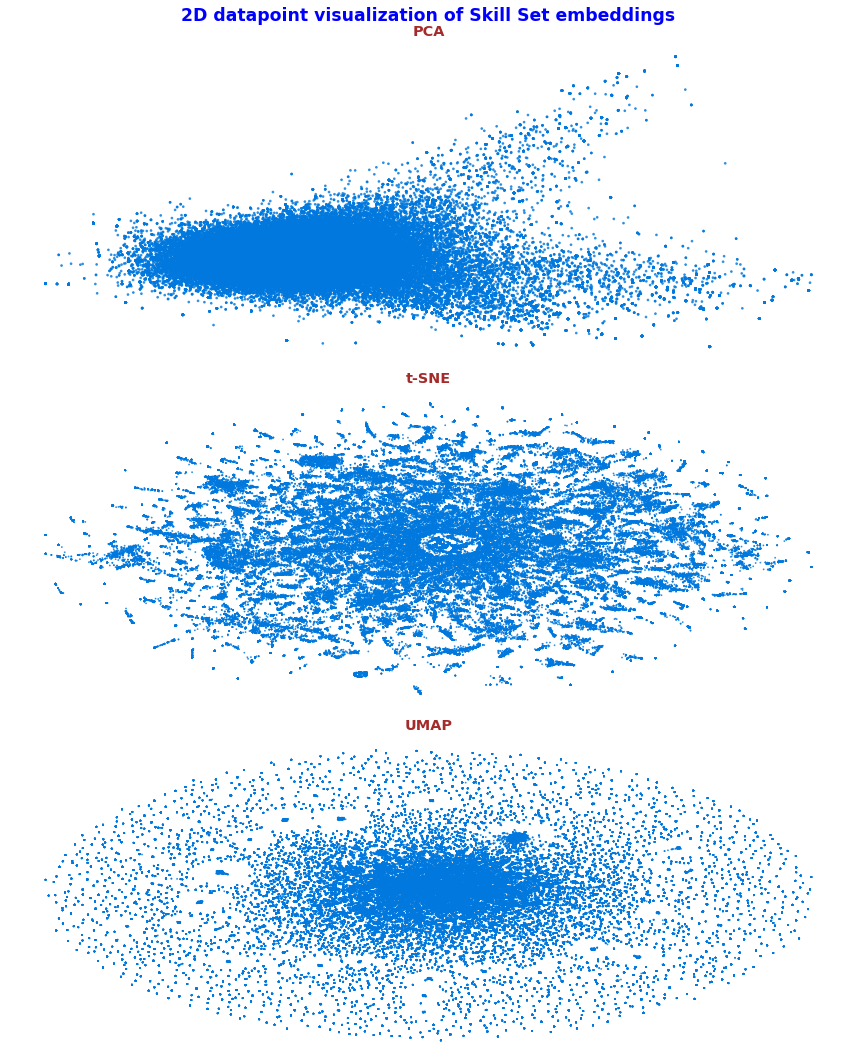

In [5]:
plot_title = "2D datapoint visualization of Skill Set embeddings"
plot_filename = RESULT_DIR + "skill_embeddings_visualization.png"
palette = sns.color_palette("hls", as_cmap=True)
colors = cm.nipy_spectral(np.array([0.25]*skill_embeddings.shape[0]))

# Visualize clusters with PCA and t-SNE
visualize_cluster(
    plot_title,
    (12, 15),
    colors,
    palette,
    3,
    pca_datapoint,
    tsne_datapoint,
    umap_datapoint,
    pca=True,
    tsne=True,
    compute_umap=True,
    save_plots=True,
    plot_file=plot_filename
)